In [1]:
import pandas as pd
import os
import sys
import json
import matplotlib.pyplot as plt
from scipy.stats import gmean
import numpy as np

import common

sys.path.insert(1, '../runner')
import nbs_to_run

In [2]:
from pathlib import Path
import numpy as np
import statistics

def gen_plot(sf):
  sf_idxs = {
    'default': 0,
    '5-sec': 1,
    '10-sec': 2,
    '20-sec': 3
  }
  sf_idx = sf_idxs[sf]
    
  directory = Path(f'../runner/output/stats-pandas-default')
  files = [f.name for f in directory.iterdir() if f.is_file()]
  files.remove('.version')
  fnames = files

  labels = ['Modin', 'Dask', 'Koalas', 'Dias']
  x = np.arange(len(labels))
    
  def get_dir_num_nbs(dir_):
    res = 0
    for fname in fnames:
      if not os.path.exists(os.path.join(dir_, fname)):
        continue
      res += 1
    ### END FOR ###
    return res
    
  #results
  result = [get_dir_num_nbs(f'../runner/output/stats-{lib_name}-{sf}')
         for lib_name in ['modin', 'dask', 'koalas', 'dias']]

  #color scheme
  colors = [
    '#A9A9A9',
    '#439DBC',
    '#BC6243',
    '#61BC43'
  ]

  #hatches
  hatches = ['/', 'o', '\\\\', '.', '//', 'x']

  #subplots and set figure size
  fig, ax = plt.subplots(figsize=(8, 5))

  #plot bars  
  rects = ax.bar(x, result, label='Maximum', color=colors[sf_idx], hatch=hatches[sf_idx])
  #axis labels and title

  #x-axis ticks
  ax.set_xticks(x)
  ax.set_xticklabels(labels, fontsize=20)

  #y-axis
  ax.set_yticks([0, 50, len(fnames)])
  ax.set_yticklabels(['0', '50', 'Total\n(102)'])
  ax.set_ylim(0, len(fnames) + 20)
  #horizontal line at y=1 for the baseline
  #   ax.axhline(1, color='red')
  # ax.axhline(len(fnames), color='grey', linestyle='--', linewidth=0.7)

  #gridlines
  ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='lightgrey')

  #tick parameters
  ax.tick_params(axis='both', which='major', labelsize=22)

  # annotations for each bar
  for r in rects:
    height = r.get_height()
    ax.annotate(f'{height:.0f}',
                  xy=(r.get_x() + r.get_width() / 2, height),
                  xytext=(0, 4),
                  textcoords="offset points",
                  ha='center', va='bottom',
                  fontsize=20)

  #axis labels and title
  # ax.set_xlabel(f"{' '.join([s.capitalize() for s in sf.split('-')])} target runtime", fontsize=30)
  ax.set_ylabel('# Notebooks Ran', fontsize=25)
  # if sf == 'default':
  ax.yaxis.set_label_coords(-0.15, 0.45)
  # elif sf == '5-sec':
    # pass
    # ax.yaxis.set_label_coords(-0.12, 0.45)


  #layout
  plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)

  #save as pdf
  plt.savefig(f"./coverage/num-nbs-ran-{sf}.png", format="png", dpi=400, bbox_inches="tight", pad_inches=0)

  #display
  plt.show()

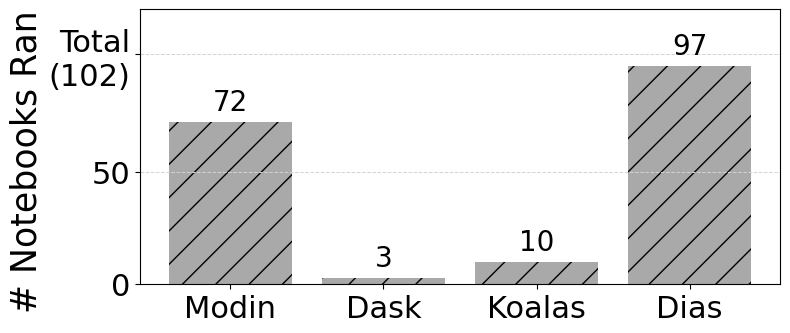

In [3]:
gen_plot('default')

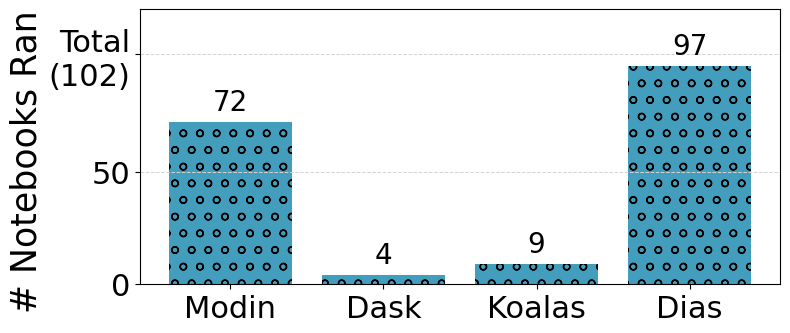

In [4]:
gen_plot('5-sec')

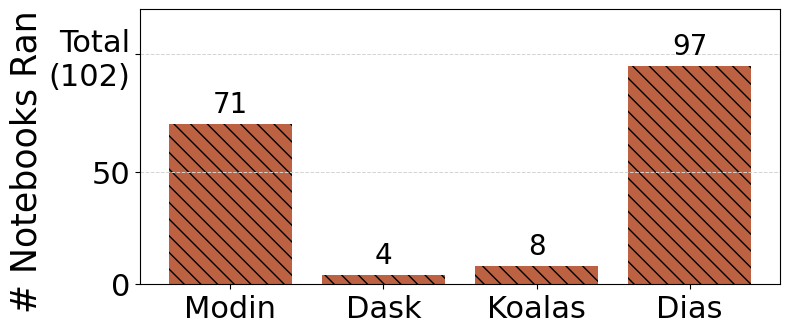

In [5]:
gen_plot('10-sec')

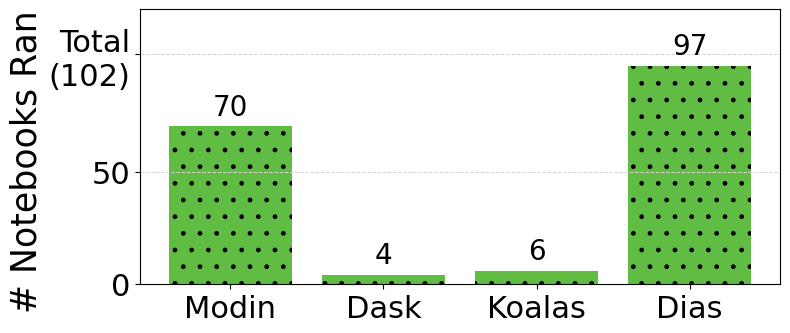

In [6]:
gen_plot('20-sec')